# Lesson 6 Assignment - Advertising Sales Regression

## Author - 



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Looking at the data, there're total 200 observations. TV, radio and newspaper are X, sales is Y.

When performing regression with numerica variables, it's better to scale the data. 

In [3]:
from sklearn.preprocessing import StandardScaler
#scale all independent variables
scaler = StandardScaler()
ad_data['TV_s'] = scaler.fit_transform(
    ad_data['TV'].values.reshape(-1,1))
ad_data['radio_s'] = scaler.fit_transform(
    ad_data['radio'].values.reshape(-1,1))
ad_data['newspaper_s'] = scaler.fit_transform(
    ad_data['newspaper'].values.reshape(-1,1))

In [4]:
#set up a function to plot datapoints and best fit line
def plot_line (x,y):
    
    # from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    
    # First initialize the model.
    linear_model = linear_model.LinearRegression()

    # Fit the model to the data
    x_input = ad_data[x].values.reshape(-1, 1)
    y_output = ad_data[y].values.reshape(-1, 1)
    linear_model.fit(x_input, y_output)

    # Get predictions
    y_pred = linear_model.predict(x_input)

    # Plot output
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_pred, linewidth=2)
    plt.grid(True)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("%s vs %s" %(x,y))

    # Print model parameters
    # Get slope (m) and y-intercept (b)
    print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
    print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

### linear regression for TV vs sales

Intercept: 14.02250
Slope : 4.07101


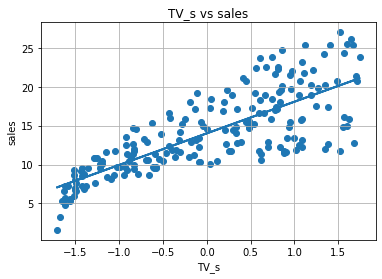

In [5]:
plot_line('TV_s', 'sales')

Y Intercept: When TV promotion is zero, sales is 14.02

Slope: When we increase TV promotion by 1 unit (in dollars) then we expect that sales will go up by 4.07

### linear regression for radio vs sales

Intercept: 14.02250
Slope : 2.99889


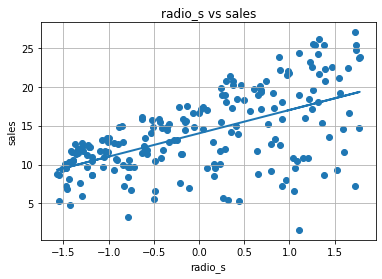

In [6]:
plot_line('radio_s', 'sales')

Y Intercept: When radio promotion is zero, sales is 14.02

Slope: When we increase radio promotion by 1 unit (in dollars) then we expect that sales will go up by 3.00

### linear regression for newspaper vs TV

Intercept: 14.02250
Slope : 1.18816


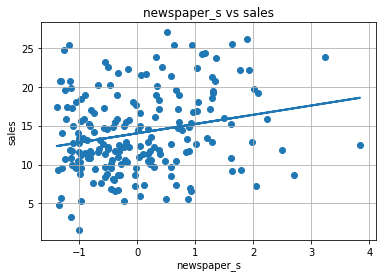

In [7]:
plot_line('newspaper_s', 'sales')

Y Intercept: When newspaper promotion is zero, sales is 14.02

Slope: When we increase mewspaper promotion by 1 unit (in dollars) then we expect that sales will go up by 1.19

### regression include 3 features

In [8]:
#make 3 features into one variable 
x = ad_data [['TV_s', 'radio_s', 'newspaper_s']]
y = ad_data['sales']

In [9]:
import statsmodels.api as sm
X = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        21:00:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.0225      0.119    117.655      

sales = 14.0225 + 3.9193 * TV_s + 2.7921 * radio_s - 0.0225 * newspaper_s

When there's no promotion at all, sales would be 14.0225.

When all three promotions are taken into account, TV_s has the greatest influence on sales. Both TV_s and radio_s have positive impact on sales, with 1 unit increased in TV promotions, sales will increase by 3.91; and with 1 unit increased in radio promotions, sales will increase by 2.79. Interestingly, promotions in newspaper seems like to have a negative influence in sales, with 1 unit increased in TV promotions, sales will decrease by -0.0225. However, this effect could be negligible compared other two promotions.

The adjusted r-squared is 0.896, from the stats summary. 

The adjusted r-squared is a modified version of r-squared which is adjusted for degrees of freedom and number of model parameters. Adjusted r-squared will be smaller than r-sqaured as the number of terms increases in the dataset. The adjusted r-squared value only increases when the new term improves the model fit, while it decreases when the term doesn't improve the model fit. 
When the maximum of adjusted r-squared is 1, meaning the the line perfectly fits the data. Zero r-squared means the line doesn't fit the data at all. Here, the adjusted r-squared is 0.896, suggesting the model fits quite well. 

In [10]:
# compute the mean squared error
print('MSE: %.5f'%(np.sqrt(model.mse_model)))

MSE: 40.25056


The MSE is 40.25056